Decision Tree Accuracy =  0.7076923076923077  ( 0.11691295502746665 )
Decision Stump Accuracy =  0.7923076923076924  ( 0.06481653671674123 )
3-level Decision Tree =  0.7615384615384616  ( 0.08213137116947164 )


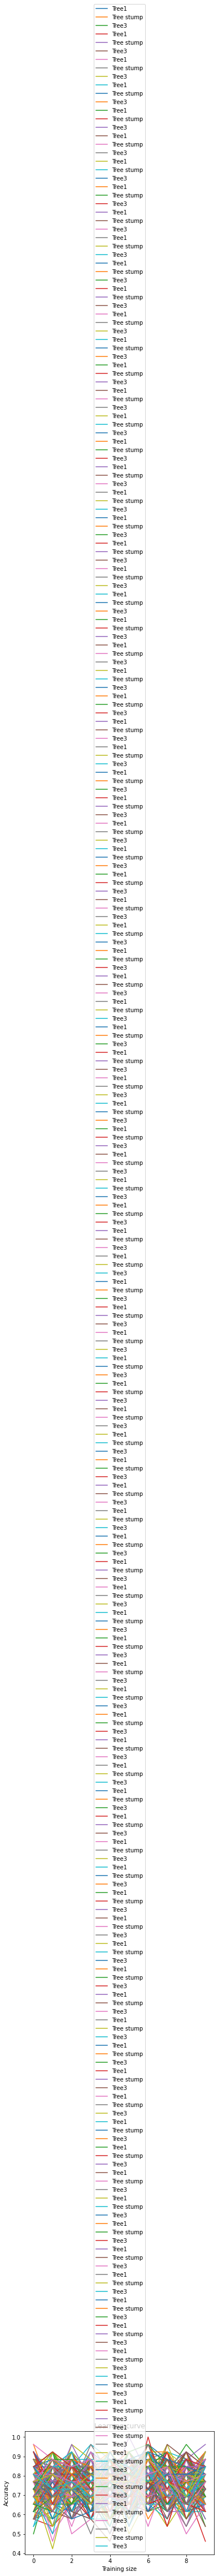

In [2]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Chris Clingerman
'''

import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score

numOfFoldsPerTrial = 10

def evaluatePerformance(numTrials=100):
    '''
    Evaluate the performance of decision trees,
    averaged over 1,000 trials of 10-fold cross validation
    
    Return:
      a matrix giving the performance that will contain the following entries:
      stats[0,0] = mean accuracy of decision tree
      stats[0,1] = std deviation of decision tree accuracy
      stats[1,0] = mean accuracy of decision stump
      stats[1,1] = std deviation of decision stump
      stats[2,0] = mean accuracy of 3-level decision tree
      stats[2,1] = std deviation of 3-level decision tree
      
    ** Note that your implementation must follow this API**
    '''
    
    # Load Data
    filename = 'data/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = np.array([data[:, 0]]).T
    n,d = X.shape

    # create list to hold data
    
    

    # perform 100 trials
    for x in range(0, numTrials):
        # shuffle the data
        idx = np.arange(n)
        np.random.seed(13)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        train_size = []
        treeAccuracies = []
        stumpAccuracies = []
        dt3Accuracies = []

        # split the data randomly into 10 folds
        folds = []
        intervalDivider = int(len(X)/numOfFoldsPerTrial)
        for fold in range(0, numOfFoldsPerTrial):
            # designate a new testing range
            Xtest = X[fold * intervalDivider:(fold + 1) * intervalDivider,:]
            ytest = y[fold * intervalDivider:(fold + 1) * intervalDivider,:]
            Xtrain = X[:(fold * intervalDivider),:]
            ytrain = y[:(fold * intervalDivider),:]
            Xtrain = Xtrain.tolist()
            ytrain = ytrain.tolist()

            # complete the training data set so that it contains all
            # data except for the current test fold
            for dataRow in range((fold + 1) * intervalDivider, len(X)):
                Xtrain.append(X[dataRow])
                ytrain.append(y[dataRow])

            # train the decision tree
            clf = tree.DecisionTreeClassifier()
            clf = clf.fit(Xtrain,ytrain)

            # train the 1-level decision tree
            oneLevel = tree.DecisionTreeClassifier(max_depth=1)
            oneLevel = oneLevel.fit(Xtrain,ytrain)

            # train the 3-level decision tree
            threeLevel = tree.DecisionTreeClassifier(max_depth=3)
            threeLevel = threeLevel.fit(Xtrain,ytrain)

            # output predictions on the remaining data
            y_pred_tree = clf.predict(Xtest)
            y_pred_stump = oneLevel.predict(Xtest)
            y_pred_dt3 = threeLevel.predict(Xtest)

            # compute the training accuracy of the model and save to the 
            # list of all accuracies
            treeAccuracies.append(accuracy_score(ytest, y_pred_tree))
            stumpAccuracies.append(accuracy_score(ytest, y_pred_stump))
            dt3Accuracies.append(accuracy_score(ytest, y_pred_dt3))
  
            train_size.append(fold)
        plt.plot(train_size,treeAccuracies, label = 'Tree1')
        plt.plot(train_size,stumpAccuracies, label ='Tree stump')
        plt.plot(train_size,dt3Accuracies, label = 'Tree3')
        plt.title('Learning curve')
        plt.xlabel('Training size')
        plt.ylabel('Accuracy')
        plt.legend(loc = 'best')
    # Update these statistics based on the results of your experiment
    #plot
    
    
    meanDecisionTreeAccuracy = np.mean(treeAccuracies)
    stddevDecisionTreeAccuracy = np.std(treeAccuracies)
    meanDecisionStumpAccuracy = np.mean(stumpAccuracies)
    stddevDecisionStumpAccuracy = np.std(stumpAccuracies)
    meanDT3Accuracy = np.mean(dt3Accuracies)
    stddevDT3Accuracy = np.std(dt3Accuracies)

    # make certain that the return value matches the API specification
    stats = np.zeros((3,2))
    stats[0,0] = meanDecisionTreeAccuracy
    stats[0,1] = stddevDecisionTreeAccuracy
    stats[1,0] = meanDecisionStumpAccuracy
    stats[1,1] = stddevDecisionStumpAccuracy
    stats[2,0] = meanDT3Accuracy
    stats[2,1] = stddevDT3Accuracy
    return stats



# Do not modify from HERE...
if __name__ == "__main__":
    
    stats = evaluatePerformance()
    print ("Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
    print ("Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
    print ("3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")
# ...to HERE.